In [ ]:
import ee
import geemap

ee.Authenticate()
ee.Initialize(project='ee-haripriyads24')


In [2]:
# In Colab, after you’ve done pip install earthengine-api geemap folium:
import ee
import geemap
ee.Authenticate()
ee.Initialize(project='ee-haripriyads24')
print("ee version:", ee.__version__)
print("geemap version:", geemap.__version__)


ee version: 1.5.18
geemap version: 0.35.3


In [ ]:
from geemap import chart

In [1]:
import folium

# Center of the map near Sangam
map_prayagraj = folium.Map(location=[25.435, 81.88], zoom_start=13)

# Adjusted coordinates for crowd gathering zones (on river or bank edge)
ghats = [
    {"name": "Sangam Ghat", "coords": [25.4302, 81.8860], "color": "red"},
    {"name": "Arail Ghat", "coords": [25.4295, 81.9020], "color": "orange"},
    {"name": "Saraswati Ghat", "coords": [ 25.4216, 81.880], "color": "blue"},
    {"name": "Daraganj Ghat", "coords": [25.4427, 81.8812], "color": "green"},
    {"name": "Ram Ghat", "coords": [25.4353 , 81.8820], "color": "purple"},
]

# Add star markers for crowd zones
for ghat in ghats:
    folium.Marker(
        location=ghat["coords"],
        popup=ghat["name"],
        icon=folium.Icon(color=ghat["color"], icon='star', prefix='fa')
    ).add_to(map_prayagraj)

# Display map
map_prayagraj


In [ ]:
import folium

# Exact gathering location you provided
gathering_location = [25.4427, 81.8812]

# Ghat and event info
popup_info = """
<b>Daraganj Ghat</b><br>
Activity Size: 🔶 Medium (localized)<br>
Event: Pitru Paksha (ancestral tarpan)<br>
River Contact: YES – inside river (user-defined location)
"""

# Create the map centered at this river point
m = folium.Map(location=gathering_location, zoom_start=14)

# Add orange star marker at river gathering point
folium.Marker(
    location=gathering_location,
    popup=folium.Popup(popup_info, max_width=300),
    icon=folium.Icon(color='green', icon='star', prefix='fa')
).add_to(m)

# Display the map
m







In [ ]:
import pandas as pd
import numpy as np

# May Data (Updated)
df_may = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023, 2024],
    "Mean_NDTI": [-0.0861, -0.0558, -0.0836, 0.0078, -0.0153, 0.0129],
    "StdDev_NDTI": [0.0350, 0.0595, 0.0899, 0.0417, 0.0671, 0.0557],
    "ZScore_Mean": [-1.2159, -0.4702, -1.1557, 1.0953, 0.5268, 1.2196],
    "Predicted_Trend": [-0.0872, -0.0670, -0.0468, -0.0265, -0.0063, 0.0139]
})

# October Data (Already includes 2024)
df_oct = pd.DataFrame({
    "Year": [2019, 2020, 2021, 2022, 2023, 2024],
    "Mean_NDTI": [-0.0050, -0.0650, -0.0198, 0.0189, -0.0411, -0.0235],
    "StdDev_NDTI": [0.0456, 0.0945, 0.0684, 0.0636, 0.1199, 0.0683],
    "ZScore_Mean": [0.6659, -1.6065, 0.1042, 1.5725, -0.7005, -0.0357],
    "Predicted_Trend": [-0.0238, -0.0233, -0.0228, -0.0223, -0.0218, -0.0213]
})



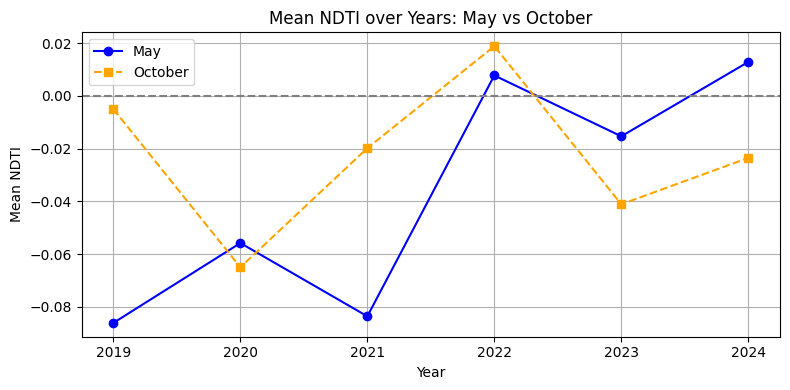

In [ ]:
# Cell 2: Mean NDTI Comparison Line Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df_may["Year"], df_may["Mean_NDTI"], 'o-', label='May', color='blue')
plt.plot(df_oct["Year"], df_oct["Mean_NDTI"], 's--', label='October', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Mean NDTI over Years: May vs October")
plt.xlabel("Year")
plt.ylabel("Mean NDTI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


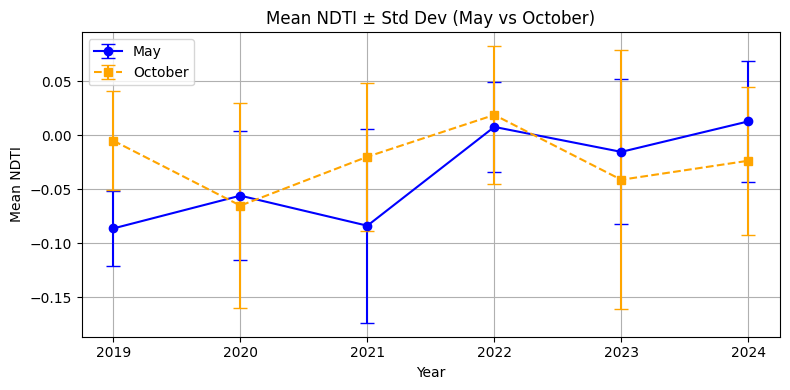

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 4))

# May (2019–2024)
plt.errorbar(
    df_may["Year"],
    df_may["Mean_NDTI"],
    yerr=df_may["StdDev_NDTI"],
    fmt='o-', label='May', capsize=5, color='blue'
)

# October (2019–2024) — now includes 2024
plt.errorbar(
    df_oct["Year"],
    df_oct["Mean_NDTI"],
    yerr=df_oct["StdDev_NDTI"],
    fmt='s--', label='October', capsize=5, color='orange'
)

# Labels & layout
plt.title("Mean NDTI ± Std Dev (May vs October)")
plt.xlabel("Year")
plt.ylabel("Mean NDTI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



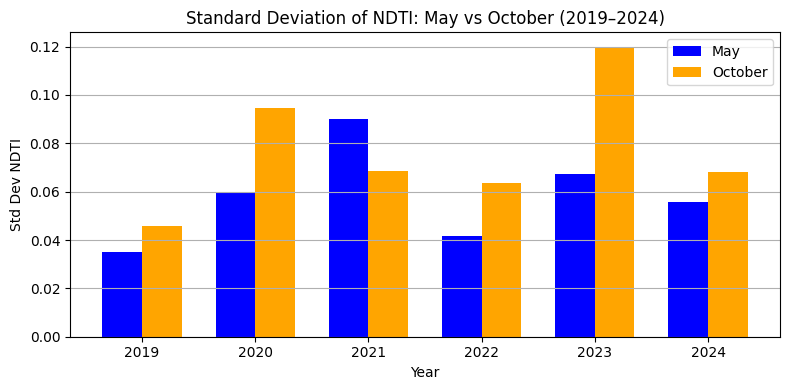

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure both DataFrames have matching years for plotting
years = np.array(df_oct["Year"])  # Both should be 2019–2024
width = 0.35

plt.figure(figsize=(8, 4))

# Bar plot: May
plt.bar(years - width/2, df_may["StdDev_NDTI"], width, label='May', color='blue')

# Bar plot: October
plt.bar(years + width/2, df_oct["StdDev_NDTI"], width, label='October', color='orange')

# Labels and layout
plt.title("Standard Deviation of NDTI: May vs October (2019–2024)")
plt.xlabel("Year")
plt.ylabel("Std Dev NDTI")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()



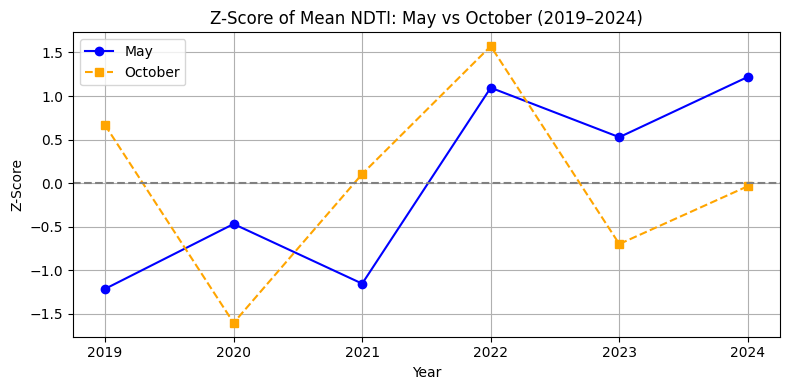

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# May Z-Scores (2019–2024)
plt.plot(df_may["Year"], df_may["ZScore_Mean"], 'o-', label='May', color='blue')

# October Z-Scores (2019–2024) — now includes 2024
plt.plot(df_oct["Year"], df_oct["ZScore_Mean"], 's--', label='October', color='orange')

# Zero reference line
plt.axhline(0, linestyle='--', color='gray')

# Labels and layout
plt.title("Z-Score of Mean NDTI: May vs October (2019–2024)")
plt.xlabel("Year")
plt.ylabel("Z-Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



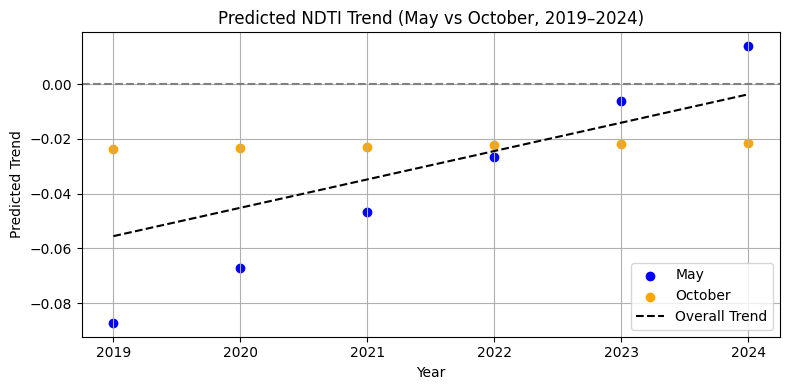

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 4))

# Scatter plots for May and October
plt.scatter(df_may["Year"], df_may["Predicted_Trend"], color='blue', label='May')
plt.scatter(df_oct["Year"], df_oct["Predicted_Trend"], color='orange', label='October')

# Combine all years for trend line (now includes full 2019–2024)
years_combined = np.concatenate([df_may["Year"], df_oct["Year"]])
trend_combined = np.concatenate([df_may["Predicted_Trend"], df_oct["Predicted_Trend"]])

# Regression line over both May and October trends
coeffs = np.polyfit(years_combined, trend_combined, 1)
trend_line = np.poly1d(coeffs)

# Plot the regression line
plt.plot(np.sort(years_combined), trend_line(np.sort(years_combined)), 'k--', label='Overall Trend')

# Plot settings
plt.title("Predicted NDTI Trend (May vs October, 2019–2024)")
plt.xlabel("Year")
plt.ylabel("Predicted Trend")
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

